In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader, TensorDataset

#Test Train Split - Vanilla case

In [2]:
# Data prep
iris = sns.load_dataset("iris")
iris.head()

iris.species.drop_duplicates()

iris["species_num"] = np.where(iris.species=="setosa",0,np.where(iris.species=="versicolor",1,2))
iris[["species","species_num"]].value_counts()

data = iris[iris.columns[0:4]]
data.head()

data = torch.tensor(data.values).float()
data[0:5]

labels = torch.tensor(iris[iris.columns[5]].values)

print("data.shape",data.shape)
print("labels.shape",labels.shape)

data.shape torch.Size([150, 4])
labels.shape torch.Size([150])


In [ ]:
#test train split
popTraining = 0.8
nTraining = int(len(data)*popTraining)

#initialize boolean vector to select data and labels
traintestBool = np.zeros(len(data),dtype = bool)
traintestBool[range(nTraining)] = True

#randomly selecting train/test splits
items2train = np.random.choice(range(len(data)),nTraining,replace = False)
traintestBool = np.zeros(len(data),dtype = bool)
traintestBool[items2train] = True

#Balance of data
print("Average data",labels.float().mean())
print("Average training data",labels[traintestBool].float().mean())
print("Average test data",labels[~traintestBool].float().mean())

Average data tensor(1.)
Average training data tensor(0.9667)
Average test data tensor(1.1333)


training data.shape torch.Size([120, 4])
test data.shape torch.Size([30, 4])


Text(0.5, 1.0, 'Loss vs iterations')

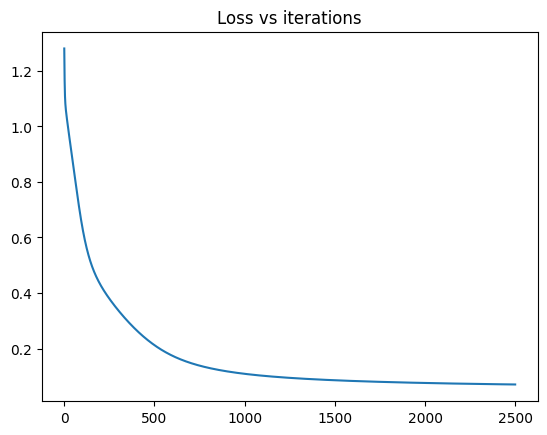

In [ ]:
ANNiris = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3)

)

lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNiris.parameters(),lr = 0.01)

print("training data.shape",data[traintestBool].shape)
print("test data.shape",data[~traintestBool].shape)

#training
numepochs = 2500
losses = torch.zeros(numepochs)
ongoingacc = []

trainingdata = data[traintestBool,:]
traininglabels = labels[traintestBool]


for epochi in range(numepochs):
  yhat = ANNiris(trainingdata)
  loss = lossfun(yhat,traininglabels)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  acc = torch.mean((torch.argmax(yhat,axis = 1)==traininglabels).float())*100
  ongoingacc.append(acc)

plt.plot(losses.detach())
plt.title("Loss vs iterations")


test accuracy tensor(93.3333)
train accuracy tensor(99.1667)
train accuracy tensor(99.1667)


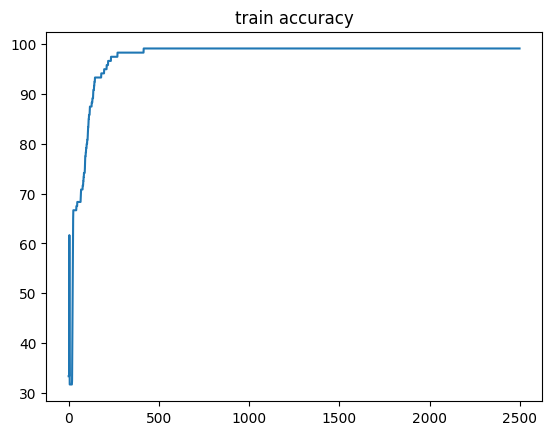

In [ ]:
plt.plot(ongoingacc)
plt.title("train accuracy")

##Test accuracy
yhat = ANNiris(data[~traintestBool,:])
acc = torch.mean((torch.argmax(yhat,axis = 1)==labels[~traintestBool]).float())*100
print("test accuracy",acc)

#Train data
yhat = ANNiris(trainingdata)
acc = torch.mean((torch.argmax(yhat,axis = 1)==traininglabels).float())*100
print("train accuracy",acc)
print("train accuracy",ongoingacc[-1])

#Test Train Split - Scikit Learn

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, shuffle = True)

print(data_train.shape)
print(labels_train.shape)
print(data_test.shape)
print(labels_test.shape)

torch.Size([120, 4])
torch.Size([120])
torch.Size([30, 4])
torch.Size([30])


In [30]:
#model initialization
def model_initialize():
  model = nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3)

  )

  lossfun = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

  return model,lossfun,optimizer

#training
def training(trainProp,model,lossfun,optimizer,numepochs):
  data_train, data_test, labels_train, labels_test = train_test_split(data, labels, train_size = trainProp, shuffle = True)

  losses = torch.zeros(numepochs)
  trainAcc = []
  testAcc = []

  for epochi in range(numepochs):
    yhat = model(data_train)
    loss = lossfun(yhat,labels_train)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    yhat_train = model(data_train)
    yhat_test = model(data_test)

    trainAcc.append(torch.mean((torch.argmax(yhat_train,axis = 1)==labels_train).float())*100)
    testAcc.append(torch.mean((torch.argmax(yhat_test,axis = 1)==labels_test).float())*100)

  return trainAcc,testAcc

Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
)
[tensor(35.8333), tensor(35.), tensor(34.1667), tensor(35.), tensor(37.5000), tensor(46.6667), tensor(56.6667), tensor(66.6667), tensor(67.5000), tensor(67.5000), tensor(67.5000), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3333), tensor(68.3

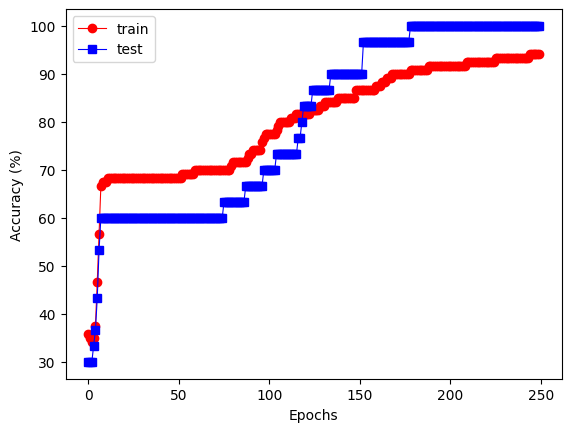

In [ ]:
numepochs = 250

model,lossfun,optimizer  = model_initialize()
print(model)

trainAcc,testAcc = training(0.8,model,lossfun,optimizer,numepochs)
print(trainAcc,testAcc)

plt.plot(trainAcc,'ro-',label = "train", linewidth=0.8)
plt.plot(testAcc,'bs-',label = "test", linewidth=0.8)
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()

In [ ]:
numepochs = 200
trainingSetSizes = np.linspace(0.2,0.95,10)
allTrainAcc = np.zeros((len(trainingSetSizes),numepochs))
allTestAcc = np.zeros((len(trainingSetSizes),numepochs))

for i in range(len(trainingSetSizes)):

  model,lossfun,optimizer  = model_initialize()

  trainAcc,testAcc = training(trainingSetSizes[i],model,lossfun,optimizer,numepochs)
  allTrainAcc[i,:] = trainAcc
  allTestAcc[i,:] = testAcc

/tmp/ipython-input-2435964587.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allTrainAcc[i,:] = trainAcc
/tmp/ipython-input-2435964587.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allTestAcc[i,:] = testAcc


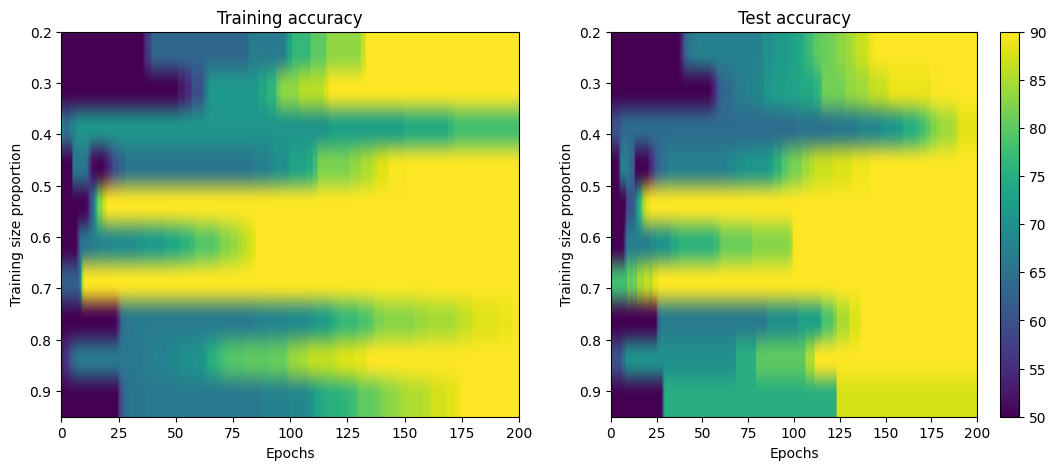

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (13,5))

ax[0].imshow(allTrainAcc,aspect ='auto',vmin=50,vmax=90,extent=[0,numepochs,trainingSetSizes[-1],trainingSetSizes[0]])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Training size proportion")
ax[0].set_title("Training accuracy")

p = ax[1].imshow(allTestAcc,aspect ='auto',vmin=50,vmax=90,extent=[0,numepochs,trainingSetSizes[-1],trainingSetSizes[0]])
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training size proportion")
ax[1].set_title("Test accuracy")

fig.colorbar(p,ax = ax[1])

#Dataloader & Mini-Batches

In [4]:
dummy_data = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
dummy_labels = np.arange(10)>4
print(dummy_data)
print(dummy_labels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
[False False False False False  True  True  True  True  True]


In [5]:
dummy_dataLdr = DataLoader(dummy_data,shuffle = False)
print(dummy_dataLdr)
print(dummy_dataLdr.batch_size)

for i,onesample in enumerate(dummy_dataLdr):
  print(i,onesample,onesample.shape)

1
0 tensor([[11, 12, 13, 14]]) torch.Size([1, 4])
1 tensor([[21, 22, 23, 24]]) torch.Size([1, 4])
2 tensor([[31, 32, 33, 34]]) torch.Size([1, 4])
3 tensor([[41, 42, 43, 44]]) torch.Size([1, 4])
4 tensor([[51, 52, 53, 54]]) torch.Size([1, 4])
5 tensor([[61, 62, 63, 64]]) torch.Size([1, 4])
6 tensor([[71, 72, 73, 74]]) torch.Size([1, 4])
7 tensor([[81, 82, 83, 84]]) torch.Size([1, 4])
8 tensor([[91, 92, 93, 94]]) torch.Size([1, 4])
9 tensor([[101, 102, 103, 104]]) torch.Size([1, 4])


In [6]:
consolidated_dataset = torch.utils.data.TensorDataset(torch.tensor(dummy_data),torch.tensor(dummy_labels).float())
print(consolidated_dataset)
print()

#viewing the tuples contained in the tensor dataset
for i in consolidated_dataset:
  print(i)
print()

consolidated_dataset.tensors


(tensor([11, 12, 13, 14]), tensor(0.))
(tensor([21, 22, 23, 24]), tensor(0.))
(tensor([31, 32, 33, 34]), tensor(0.))
(tensor([41, 42, 43, 44]), tensor(0.))
(tensor([51, 52, 53, 54]), tensor(0.))
(tensor([61, 62, 63, 64]), tensor(1.))
(tensor([71, 72, 73, 74]), tensor(1.))
(tensor([81, 82, 83, 84]), tensor(1.))
(tensor([91, 92, 93, 94]), tensor(1.))
(tensor([101, 102, 103, 104]), tensor(1.))



(tensor([[ 11,  12,  13,  14],
         [ 21,  22,  23,  24],
         [ 31,  32,  33,  34],
         [ 41,  42,  43,  44],
         [ 51,  52,  53,  54],
         [ 61,  62,  63,  64],
         [ 71,  72,  73,  74],
         [ 81,  82,  83,  84],
         [ 91,  92,  93,  94],
         [101, 102, 103, 104]]),
 tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))

In [10]:
dummy_dataLdr = DataLoader(consolidated_dataset,shuffle = False,batch_size = 4) #default batchsize = 1
print(dummy_dataLdr)
print(dummy_dataLdr.batch_size)

for i,onesample in enumerate(dummy_dataLdr):
  print(i,onesample)
  print()

4
0 [tensor([[11, 12, 13, 14],
        [21, 22, 23, 24],
        [31, 32, 33, 34],
        [41, 42, 43, 44]]), tensor([0., 0., 0., 0.])]

1 [tensor([[51, 52, 53, 54],
        [61, 62, 63, 64],
        [71, 72, 73, 74],
        [81, 82, 83, 84]]), tensor([0., 1., 1., 1.])]

2 [tensor([[ 91,  92,  93,  94],
        [101, 102, 103, 104]]), tensor([1., 1.])]



In [15]:
print("data.shape",data.shape)
print("labels.shape",labels.shape)

data.shape torch.Size([150, 4])
labels.shape torch.Size([150])


In [38]:
x_train, x_test, y_train, y_test = train_test_split(data,labels, train_size = 0.8)
print("x_train.shape",x_train.shape)
print("x_test.shape",x_test.shape)
print("y_train.shape",y_train.shape)
print("y_test.shape",y_test.shape)

xy_train = TensorDataset(x_train,y_train)
xy_test = TensorDataset(x_test,y_test)

xy_test.tensors[1].shape

xy_train_dldr = DataLoader(xy_train,shuffle = True, batch_size = 12)
xy_test_dldr = DataLoader(xy_test, shuffle = True, batch_size = xy_test.tensors[0].shape[0]) #one single batch of test data

x_train.shape torch.Size([120, 4])
x_test.shape torch.Size([30, 4])
y_train.shape torch.Size([120])
y_test.shape torch.Size([30])


In [54]:
#training
def training(xy_train_dldr,xy_test_dldr,model,lossfun,optimizer,numepochs):

  trainAcc = []
  testAcc = []

  for epochi in range(numepochs):

    #loop over training data batches
    batchAcc = []

    for x,y in xy_train_dldr:

      yhat = model(x)
      loss = lossfun(yhat,y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchAcc.append(torch.mean((torch.argmax(yhat,axis = 1)==y).float())*100)

    trainAcc.append(np.mean(batchAcc))

    #test accuracy
    x,y = next(iter(xy_test_dldr))
    predlabels = model(x)
    testAcc.append(torch.mean(((torch.argmax(predlabels,axis = 1)==y).float())*100))

  return trainAcc,testAcc

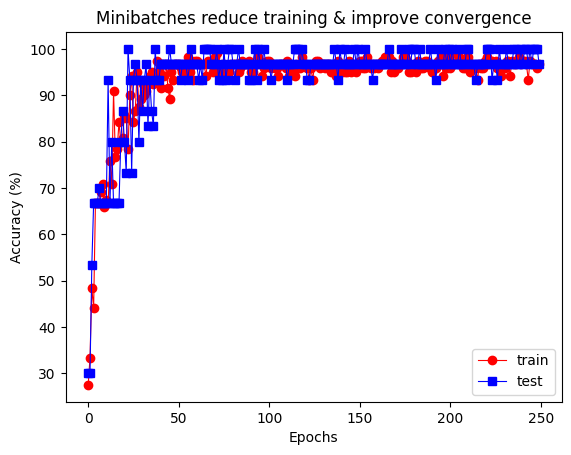

In [64]:
model, lossfun, optimizer = model_initialize()
numepochs = 250
w,z  = training(xy_train_dldr,xy_test_dldr,model,lossfun,optimizer,numepochs)

plt.plot(w,'ro-',label = "train", linewidth=0.8)
plt.plot(z,'bs-',label = "test", linewidth=0.8)
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Minibatches reduce training & improve convergence")
plt.legend()

In [ ]:
#Overfitting essentially limits our ability to generalize over unseen data
#Overfitting vs. underfitting
#Underfitting occurs when a mathematical model cannot adequately capture the underlying structure of the data.
#An under-fitted model is a model that is missing some parameters or terms that would appear in a correctly specified model
#How is overfitting identified/avoided - low dimensional space (visualization) ; higher dimensional space (cross validation); regularization techniques
#Data = Training set + Hold out set + Test set
#crucial assumption of cross validation - hold out & test set must be uncorrelated/independent/orthogonal with training set